# HE Filtering Model with Convolution Layer

## Convolution Neural Network


&nbsp;  CNN을 간단하게 이해하기 위해서는 CNN의 기원인 고양이 뇌 연구로 거슬러 올라가야 한다. 사물을 인식할 때의 고양이의 뇌를 들여다보니 뇌의 전체가 아닌 일부만 활성화가 됨을 발견하였는데, 이를 컴퓨터 비전(computer vision)에 접목시킨 것이 바로 CNN이다. CNN은 쉽게 말해 이미지가 주어질 때 이미지의 일정 부분만을 학습하여 주요 특징을 추출하는 알고리즘이다. 특징을 추출하기 위해서는 지금까지 사용한 Linear 레이어와는 또 다른 레이어들을 사용해야 하는데, 그 중 하나가 바로 Convolution Layer이다.


![image1](https://blogfiles.pstatic.net/MjAyMDAzMjNfMTcz/MDAxNTg0OTUwMTE4MDU0.fiWK8N3YHNe8X9kvuDfXgyYz8P7Vi59wnSpWxyc92lcg.ZHg8SW2IqBth3cqI4jJey8yjVXIK6CkPKPUBVPAcIQIg.JPEG.mint_vkkk/%EC%BA%A1%EC%B2%98.JPG?type=w2)


&nbsp;  Convolution Layer는 간단히 말해 필터 학습을 수행하는 레이어이다. 위 그림을 보면 input으로 주어진 이미지는 (32 x 32 x 3) 크기의 이미지이다. 해석하면 높이 32, 넓이 32, 그리고 색상 3(Red, Green, Blue)의 이미지라고 볼 수 있다. 필터는 이미지의 일부의 특징을 추출하기 위한 것이다. 예를 들어 사람의 얼굴을 인식할 때 둥근 부분만 따로 추출해내는 필터나 날카로운 부분만 추출해내는 필터 등 사람 얼굴을 인식하기 위한 다양한 특징을 추출하기 위한 여러 가지 필터가 존재하는 것이다. 특징을 추출할 때 대부분의 경우 이미지의 색을 굳이 변경할 필요가 없기에 위 예시에서는 필터의 크기를 (5 x 5 x 3)로 정해주었다.
&nbsp;  필터는 가설 `Wx + b`의 가중치 `W`와 `b`의 역할을 한다. 지금까지 우리는 손실함수를 최소화하는 가중치값을 가진 모형이 좋은 모형이라고 배웠다. 따라서 좋은 CNN 모형이라 함은 좋은 필터를 가진 CNN 모형이라고 할 수 있겠다. 하나의 필터를 통해 input 이미지를 학습하고 나온 결과를 채널(channel)이라고 부른다.


![image2](https://blogfiles.pstatic.net/MjAyMDAzMjNfMTY3/MDAxNTg0OTU5Mjg2MTQ4.BtHOY9OhMZm_MuRmiiO5kfmw7FNTP5CNZrNBzqr7xaEg.YfrcQFawKpCt1Coy09SCWS9Inynd6aNCRRfSFu6zY8Eg.GIF.mint_vkkk/unnamed.gif?type=w2)


&nbsp; 그렇다면 필터에서 가중치는 어떤 형태로 연산이 될까? 또한 필터가 주어졌을 때 Convolutional Layer에서 학습은 어떻게 진행이 될까? input shape가 (5 x 5)이고, filter shape가 (3 x 3)인 위 그림의 예시를 통해 쉽게 이해해 보자. 위 그림은 가설이 `H(x) = Wx`일때, 같은 가중치가 들어있는 하나의 필터가 input image 위를 움직이며 하나의 채널을 생성하는 과정을 보여준다. 필터는 input image 위를 움직이면서 한번의 움직임 당 하나의 숫자를 도출해 내고, 이를 합하여 채널을 만들어낸다.


![image3](https://blogfiles.pstatic.net/MjAyMDAzMjNfMjMz/MDAxNTg0OTYwNzkwMzAy.ExzaJyRpEq2R1ztpzNQUSqeEiYilKwTz3IggbFu9Zacg.sbZ_xBX3FONokNCjtA1rOoKOibos2ip1LH-6bxQw6hYg.GIF.mint_vkkk/numerical_padding_strides.gif?type=w2)


&nbsp;  이미지의 특징을 보다 잘 추출해내기 위해 Zero Padding과 Stride라는 방법을 사용하기도 한다. Zero Padding은 input image의 가장자리에 0을 둘러주는 것으로 이미지의 가장자리 부분에 있는 특징이 과소평과된다고 판단할 시 넣어준다. padding을 하지 않고 레이어를 쌓으면 레이어의 크기가 갈수록 줄어들기 때문에, 레이어를 깊에 쌓을 때 문제가 생긴다. 따라서 깊은 CNN 모델을 만들 때에는 일반적으로 많이 사용하는 기법이다. 
&nbsp; stride는 학습을 진행할 때 필터가 얼마만큼 건너 뛸 것인가를 설정해 준다. 위 그림의 경우는 stride를 2로 설정해줬을 때의 예시이다. stride가 작을 때는 특징을 꼼꼼히 살펴보고, stride가 클 때는 이미지를 전체적으로 훑어준다는 식으로 이해하면 편할 것이다.


![image4](https://blogfiles.pstatic.net/MjAyMDAzMjNfOCAg/MDAxNTg0OTY0NzY4Njg5.MjVDNcHQlY-lDpnZWmPmryQ3Q-t9l3p6Uh-LqTHcFXgg.qYWAY78NhHOBliu-tK3VXx69idfyS8gyxeYfPkuYhoMg.JPEG.mint_vkkk/1.JPG?type=w2)


&nbsp; Convolution 연산에 사용되는 필터의 개수는 사용자가 지정해 주어야 한다. 모든 필터에 대한 학습이 끝나고, activation 함수를 취해준 후 출력된 채널들을 모아 놓은 것을 activation map이라고 부른다. activation map의 크기는 input 이미지의 크기, 필터의 크기, stride, padding, 그리고 필터의 개수에 따라 좌우된다. 먼저, activation map의 height와 width는 다음과 같이 결정된다.


![image5](https://blogfiles.pstatic.net/MjAyMDAzMjRfMTk4/MDAxNTg1MDM5MzU0OTg2.OFTRWuxqHddq_pZMHsHjtlFTEefSI_yN3esC_X7X1s4g.Y1E_8SOPMOlpgXIy5Xpof3ikOVVt8w-zC8h5BfWlKQUg.JPEG.mint_vkkk/111.JPG?type=w2)


&nbsp; 만약 (5 x 5)의 input image가 주어지고 필터를 (3 x 3), stride를 1로 정해주었을 때, 윗 식에 수치를 대입해 보면 (3 x 3)의 채널이 구해짐을 알 수 있다. 나머지 차원의 숫자는 필터의 갯수, 즉 채널의 갯수를 더해주면 된다. 만약 필터가 6개 사용되었다면, (3, 3, 6)의 activation map이 출력되는 것이다.

## He Filtering Model
- 필터 학습의 개념을 이해하기 위해 STL10 dataset을 이용하여 Horizontal Edge Filtering을 수행하는 Conv Model을 만들어 볼 것이다.
- Horizontal Edge Filter란 이미지의 수평선을 추출하는 필터이다.
- 이미지의 색은 필요하지 않으므로 타겟 이미지, 즉 Y의 채널은 1이다.

## Preparation & EDA



In [0]:
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

In [12]:
import torchvision.transforms as transforms
train_transforms = torchvision.transforms.Compose([transforms.ToTensor(),])

stl10 = torchvision.datasets.STL10('../data', transform=train_transforms, download=True)
classes = stl10.classes

Files already downloaded and verified


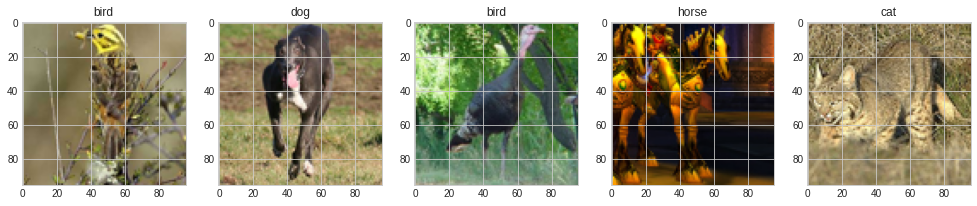

In [13]:
N_IMAGES = 5
fig, axes = plt.subplots(1, N_IMAGES, figsize=(17,4))
for (im, lbl), ax in zip(stl10, axes):
    ax.imshow(im.permute(1,2,0))
    ax.set_title(f'{classes[lbl]}')

In [14]:
images = [image for image, label in [stl10[i] for i in range(N_IMAGES)]]
labels = [label for image, label in [stl10[i] for i in range(N_IMAGES)]]
images = torch.cat([i.unsqueeze(0) for i in images], dim = 0)
images.shape

torch.Size([5, 3, 96, 96])

In [202]:
horizontal_filter = [[-.25, -.5, -1, -.5, -.25],
                     [-.5, -1, -3, -1, -.5],
                     [ 0,  0,  0,  0,  0],
                     [ .5, 1,  3,  1, .5],
                     [.25, .5, 1, .5, .25]]

h_filter = torch.FloatTensor(horizontal_filter)

h_filter = h_filter.unsqueeze(0).unsqueeze(0)
print( f'The dimension of the filter : {h_filter.shape}')

h_filter = h_filter.repeat(1,3,1,1)
print( f'The dimension of the filter : {h_filter.shape}')

# The 0-th dimension of the filter means the number of filters. 
# RGB channels = 3 channels 이므로 필터 개수를 3개로 바꿔줌

bias = np.zeros(1)
bias = torch.FloatTensor(bias)

ones_filter = torch.FloatTensor(np.ones(1)).unsqueeze(0).unsqueeze(0)
# [1] filter for reducing channel

The dimension of the filter : torch.Size([1, 1, 5, 5])
The dimension of the filter : torch.Size([1, 3, 5, 5])


## Make HE Filering Model

In [0]:
import torch.nn as nn

def HEModel():
    conv1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=5, padding=2, bias = bias)
    net = nn.Sequential(conv1)
    
    return net

In [204]:
N_images = 50
images = [image for image, label in [stl10[i] for i in range(N_images)]]
labels = [label for image, label in [stl10[i] for i in range(N_images)]]
images = torch.cat([i.unsqueeze(0) for i in images], dim = 0)
images.shape

torch.Size([50, 3, 96, 96])

In [0]:
Y = torch.nn.functional.conv2d(images, h_filter, padding = 2, bias = bias)

In [0]:
X = images

## Training

In [0]:
loss_fn = nn.MSELoss()

def training(n_epochs, optim, model, loss_fn, x, y):
    hist = {'tloss': [], 'tacc': [], 'vloss': [], 'vacc': []}
    for epoch in range(1, n_epochs+1):
        tr_loss, tr_acc = 0., 0.
        n_data = 0

        for im_batch, label_batch in zip(x, y):
            im_batch = im_batch.unsqueeze(0).to(device)
            label_batch = label_batch.to(device)
            ypred = model(im_batch)

            
            loss_train = loss_fn(ypred, label_batch)
    
            optim.zero_grad()
            loss_train.backward()
            optim.step()
            
            tr_loss += loss_train.item() * im_batch.shape[0]
            n_data  += im_batch.shape[0]
        
        # statistics
        tr_loss /= n_data
        #
        
        if epoch <= 5 or epoch % 10 == 0 or epoch == n_epochs:
             print(f'Epoch {epoch}, tloss {tr_loss:.4f}')
        
        hist['tloss'].append(tr_loss)
   
        
    print ('finished training_loop().')
    return hist
#


In [0]:
device = 'cuda'

model = HEModel().to(device)

learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
stepLR = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

criterion = torch.nn.CrossEntropyLoss().to(device)
history = None

In [212]:
hist = training(50, optimizer, model, loss_fn, X, Y)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1, 96, 96])) that is different to the input size (torch.Size([1, 1, 96, 96])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, tloss 1.6994
Epoch 2, tloss 0.0341
Epoch 3, tloss 0.0057
Epoch 4, tloss 0.0009
Epoch 5, tloss 0.0000
Epoch 10, tloss 0.0000
Epoch 20, tloss 0.0001
Epoch 30, tloss 0.0000
Epoch 40, tloss 0.0014
Epoch 50, tloss 0.0000
finished training_loop().


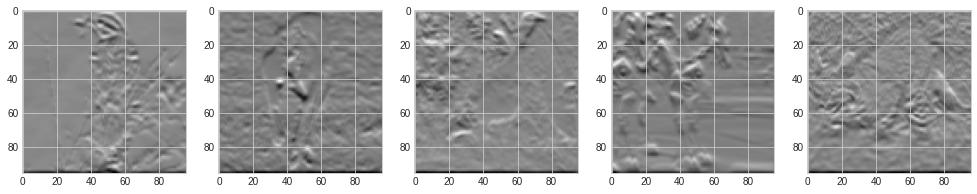

In [218]:
fig, axes = plt.subplots(1, 5, figsize=(17,4))
for im, ax in zip(Y[:5], axes):
    ax.imshow(im.squeeze(0), cmap='gray')

In [0]:
test = X[:5]
test = model(test.to(device))

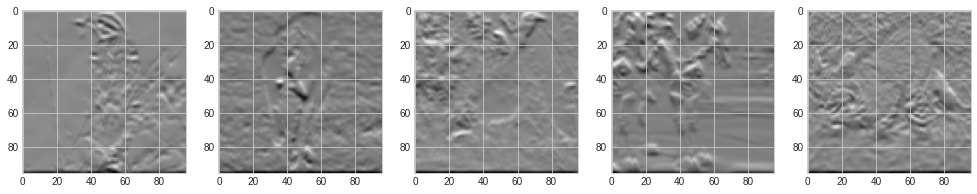

In [234]:
fig, axes = plt.subplots(1, 5, figsize=(17,4))

for im, ax in zip(test.cpu().detach(), axes):
    ax.imshow(im.squeeze(0), cmap='gray')